In [17]:
# importing csv reading in all csvs and converting to data frames

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cali_man_nyt_df = pd.read_csv('nyt_California_Man_data.csv')
cali_man_nyt_df = cali_man_nyt_df.dropna()

In [18]:
arrest = cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('arrest')]
assault = cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('assault')]
gun = cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('gun')]
kill = cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('kill')]
murder = cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('murder')]
officer= cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('officer')]
police = cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('police')]
shot = cali_man_nyt_df[cali_man_nyt_df['Summary'].str.contains('shot')]

t_arrest = cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('arrest')]
t_assault = cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('assault')]
t_gun = cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('gun')]
t_kill = cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('kill')]
t_murder = cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('murder')]
t_officer= cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('officer')]
t_police = cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('police')]
t_shot = cali_man_nyt_df[cali_man_nyt_df['Title'].str.contains('shot')]


crimes_df = pd.concat([arrest, assault, gun, kill, murder, officer, police, shot, t_arrest, t_assault, t_gun, t_kill, t_murder, t_officer, t_police, t_shot])
crimes_df = crimes_df.drop_duplicates()
crimes_df['Crimes'] = 'Reports Crime'
crimes_df.count()

Title         58
Summary       58
Link          58
Time          58
Section       58
Subsection    58
Category      58
Crimes        58
dtype: int64

In [19]:
#finding complement of crimes_df in flo_man_df

idx_cali = cali_man_nyt_df.index
idx_cri = crimes_df.index

idx_law = idx_cali.difference(idx_cri)

law_abiding = cali_man_nyt_df.loc[idx_law, :]
law_abiding_df = pd.DataFrame(law_abiding)
law_abiding_df['Crimes'] = 'Does Not Report Crime'

law_abiding_df.count()

Title         297
Summary       297
Link          297
Time          297
Section       297
Subsection    297
Category      297
Crimes        297
dtype: int64

In [20]:
nyt_report_df = pd.concat([crimes_df, law_abiding_df])

to_plot = nyt_report_df['Crimes'].tolist()
rc = to_plot.count('Reports Crime')
dnrc = to_plot.count('Does Not Report Crime')
length = len(to_plot)

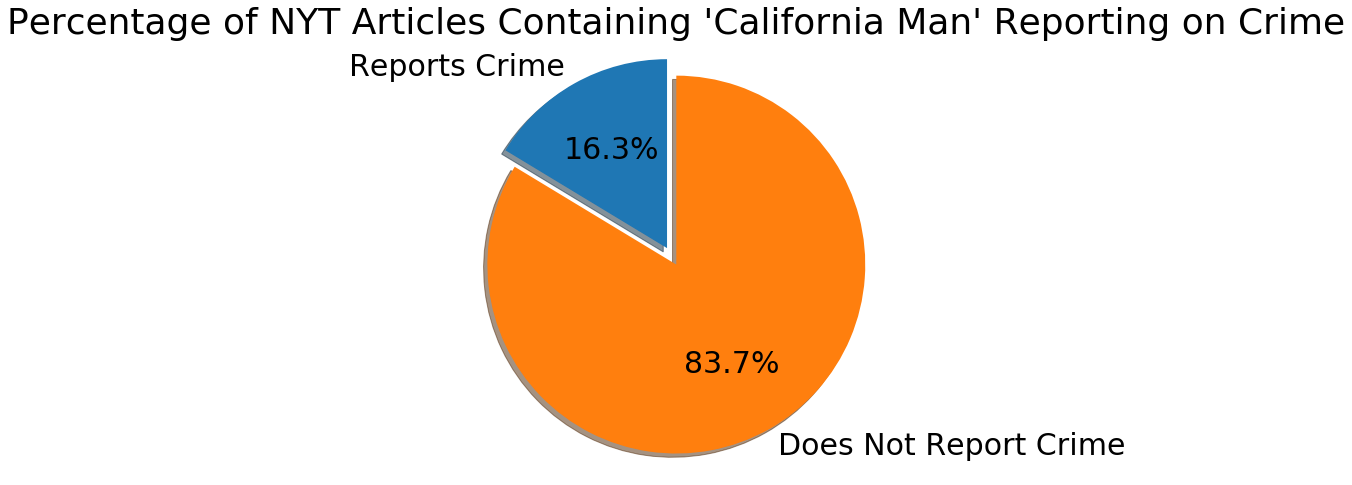

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Reports Crime', 'Does Not Report Crime']
sizes = [(rc/length*100), (dnrc/length*100)]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Percentage of NYT Articles Containing 'California Man' Reporting on Crime")
plt.rcParams.update({'font.size': 30})
fig1.set_size_inches(16, 8)
fig1.savefig('cali_nyt_crimes.png', dpi=100)

plt.show()